Pour une lecture améliorée, ce notebook est idéalement lu avec une extension qui gère les niveaux des titres Markdown.  
Par exemple avec l'extension *Table of Contents* du module *Nbextensions* de Jupyter.

# Mise en place du notebook

## Import des modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
#from pandas_profiling import ProfileReport
#from dataprep.eda import create_report
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from mesfonctions import scatter_plot
from mesfonctions import display_scree_plot
from mesfonctions import display_circles

In [6]:
# pour développement
import mesfonctions
from importlib import reload  
mesfonctions = reload(mesfonctions)

## Constantes

In [7]:
# paramètre n_jobs sklearn
N_JOBS = 6

# affichage des analyses exploratoires systématiques (pandas profile, dataprep)
# mettre True pour faire les analyses. Mettre False pour une sauvegarde du notebook sinon la taille explose
BOOL_EDA = False  

# les 6 trimestres pour les tests de stabilité
DEBUT_TRIMESTRE_1 = pd.to_datetime("2017-2-25")
FIN_TRIMESTRE_1 = pd.to_datetime("2017-5-25")
FIN_TRIMESTRE_2 = pd.to_datetime("2017-8-25")
FIN_TRIMESTRE_3 = pd.to_datetime("2017-11-25")
FIN_TRIMESTRE_4 = pd.to_datetime("2018-2-25")
FIN_TRIMESTRE_5 = pd.to_datetime("2018-5-25")
FIN_TRIMESTRE_6 = pd.to_datetime("2018-8-25")
FIN_TRIMESTRE = [DEBUT_TRIMESTRE_1, FIN_TRIMESTRE_1, FIN_TRIMESTRE_2, FIN_TRIMESTRE_3, FIN_TRIMESTRE_4, FIN_TRIMESTRE_5, FIN_TRIMESTRE_6]

## Gestion des paramètres d'affichage de Jupyter

In [8]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200
pd.set_option("colheader_justify", "left")

# pour gérer l'affichage des arrays numpy
# 230 sur config bureau, 165 sur config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:95% }</style>")

# Notes

## Olist

https://olist.com/faq/  
Société qui permet aux vendeurs e-commerce de vendre sur des "market place" (Amazon et autres).  
Sté implantée au Brésil, de type SaaS (Software as a Service).  
Pas de stock, pas d'entrepôt.  
"lorsque vous enregistrez votre produit sur notre plateforme, nous nous chargeons de le publier sur Mercado Livre, Americanas, Amazon et d'autres canaux. Vous n'avez pas besoin d'aller site par site, de créer un compte et de télécharger produit par produit."  
"la gestion des ventes avec la boutique olist est également beaucoup plus simple, car toutes les commandes sont centralisées sur notre plateforme, sans avoir besoin d'accéder à d'autres pages."  
" la différence entre s'inscrire dans la boutique olist et sur d'autres places de marché est la praticité . "  


Prestations offertes par Olist :  
- référencement / réputation.
- rédaction/ amélioration d'annonces 
- trouver le prix optimum de vente
- solutions logistiques
- suivi des ventes

Exemple de clients : LVMH, Chicco, Calvin Klein


## Traductions

boleto = paiement par chèque

## Dataset

### Olist dataset

https://www.kaggle.com/olistbr/brazilian-ecommerce

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
    

### Métadonnées

https://www.kaggle.com/olistbr/brazilian-ecommerce

###### Customers Dataset

This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

###### Geolocation Dataset

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

###### Order Items Dataset

This dataset includes data about the items purchased within each order.

###### Payments Dataset

This dataset includes data about the orders payment options.

###### Order Reviews Dataset

This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

###### Order Dataset

This is the core dataset. From each order you might find all other information.

###### Products Dataset

This dataset includes data about the products sold by Olist.

###### Sellers Dataset

This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

###### Category Name Translation

Translates the productcategoryname to english.

### Marketing funnel

https://www.kaggle.com/olistbr/marketing-funnel-olist/home  

## Data Schema

The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

<ipython-input-9-9f403ecf1f46>:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  image_data_schema = img.imread('https://i.imgur.com/HRhd2Y0.png')


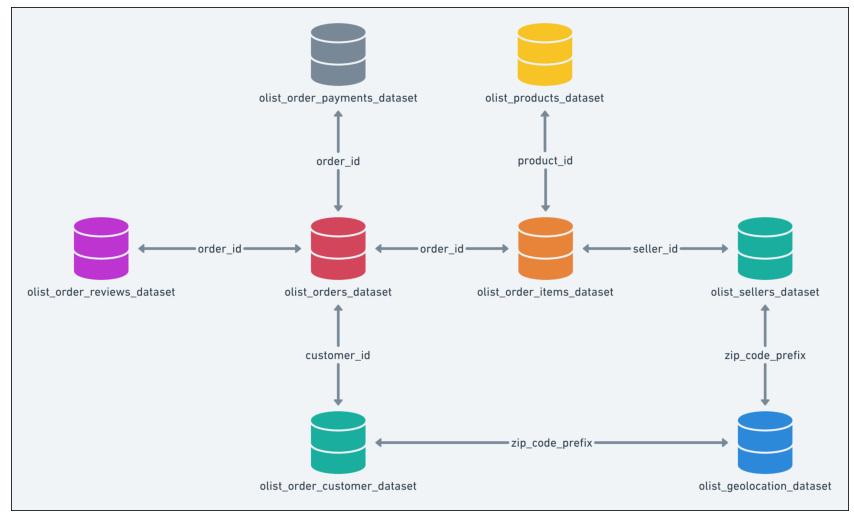

In [9]:
# image_data_schema = img.imread('HRhd2Y0.png')
image_data_schema = img.imread('https://i.imgur.com/HRhd2Y0.png')
plt.figure(figsize=(15,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image_data_schema)
plt.show()

## Définitions marketing

### Segmentation RFM

https://www.definitions-marketing.com/definition/segmentation-rfm/

La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.

# Récupération des données

## df_customers

In [11]:
df_customers = pd.read_csv('olist_customers_dataset.csv',
                           sep=',',
                           low_memory=False)

In [12]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [13]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_customers, title='df_customers Pandas Profiling Report', minimal=True)
report

False

In [14]:
report = BOOL_EDA
report = False
if report:
    report = create_report(df_customers)#, config={"insight.skewed.threshold": 1e-5})
report

False

In [15]:
print("Nombre de clients uniques :", len(df_customers['customer_unique_id'].unique()))

Nombre de clients uniques : 96096


## df_geolocation

In [16]:
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv',
                           sep=',',
                           low_memory=False)

In [17]:
df_geolocation.sort_values('geolocation_zip_code_prefix')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
...,...,...,...,...,...
1000026,99980,-28.388679,-51.848863,david canabarro,RS
999950,99980,-28.388400,-51.845225,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [18]:
report = BOOL_EDA
# report = True
if report:
    report = ProfileReport(df_geolocation, title='df_geolocation Pandas Profiling Report', minimal=True)
report

False

### Nettoyage du dataset geolocation

Les zip codes contiennent une ribambelle de données de longitude/latitude très proches. En pratique, ça revient à des doublons.  
On simplifie ce dataset en supprimant les lignes de zip codes en trop.

In [19]:
df_geolocation = df_geolocation.copy().drop_duplicates(
    subset='geolocation_zip_code_prefix', keep='first', inplace=False)
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [20]:
df_geolocation['geolocation_zip_code_prefix'].unique().shape             

(19015,)

## df_items

In [21]:
df_items = pd.read_csv('olist_order_items_dataset.csv',
                           sep=',',
                           low_memory=False)

In [22]:
df_items.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [23]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_items, title='df_items Pandas Profiling Report', minimal=True)
report

False

In [24]:
report = BOOL_EDA
# report = False
if report:
    report = create_report(df_items)
report

False

## df_payments

In [25]:
df_payments_csv = pd.read_csv('olist_order_payments_dataset.csv',
                           sep=',',
                           low_memory=False)

In [26]:
df_payments_csv

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Pourquoi la taille de df_payments est supérieure à celle de df_order ?  
L'explication est que ces paiements multiples sont souvent liés à des vouchers.  
En revanche lorsque payment_installments > 1, ces paiements n'occupent qu'une seule ligne dans df_payments

In [27]:
# on affiche les order_id en doublons
ser_bool_duplicated = df_payments_csv['order_id'].duplicated(keep=False)
df_payments_csv[ser_bool_duplicated].sort_values(by=['order_id','payment_sequential']).head(100)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45


In [28]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_payments, title='df_payments Pandas Profiling Report', minimal=True)
report

False

### Variable payment_value_order

Le format du dataset "payments" est peu pratique. 
Il sépare en plusieurs "payment_sequential" lorsqu'un ordre est payé avec différents moyens de paiements (typiquement plusieurs vouchers).  
Il est plus pratique de regrouper les différentes valeurs de "payment_value" d'un même ordre en un seul paiment : c'est pourquoi j'ai créé la variable "payment_value_sum".

In [29]:
# groupby sur customer_unique_id, puis calcul du count() pour chaque groupe
df = df_payments_csv.groupby('order_id', sort=False).sum()
df.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
df.rename(columns = {'payment_value': 'payment_value_order'}, inplace = True)
df

,payment_value_order
order_id,
b81ef226f3fe1789b1e8b2acac839d17,99.33
a9810da82917af2d9aefd1278f1dcfa0,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
ba78997921bbcdc1373bb41e913ab953,107.78
42fdf880ba16b47b59251dd489d4441a,128.45
...,...
0406037ad97740d563a178ecc7a2075c,363.31
7b905861d7c825891d6347454ea7863f,96.80
32609bbb3dd69b3c066a6860554a77bf,47.77


Note : à 1 près on retrouve les 99441 ordres du dataset "orders".

In [25]:
# on teste la valeur de la variable payment_value_sum pour un ordre payé en 2 parties (voucher + CB).
df[df.index == '0016dfedd97fc2950e388d2971d718c7']

,payment_value_order
order_id,
0016dfedd97fc2950e388d2971d718c7,70.55


Pour l'ordre '0016dfedd97fc2950e388d2971d718c7', les 6 payment_installments correspondent à 1 voucher et 5 installments de credit card.

In [30]:
# on remplace df_payments par le nouveau df
df_payments = df.copy()

## df_reviews

In [31]:
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv',
                           sep=',',
                           low_memory=False)

In [32]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [33]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_reviews, title='df_reviews Pandas Profiling Report', minimal=True)
report

False

In [34]:
with pd.option_context('display.max_colwidth', 1000):
    display(df_reviews[['review_score', 'review_comment_message']].sample(20))

,review_score,review_comment_message
93069,3,NaN
98937,4,"Quase tudo ótimo mais,, o valor do frete esta de laca, comprei 2 paguei o valo de 3 bonés, me ajuda ai né..."
79818,5,NaN
85457,4,NaN
44189,4,NaN
60168,4,NaN
64402,5,NaN
89986,5,NaN
73000,5,"Produto entregue conforme comprado, dentro do prazo, até antes.\r\nRecomendo, com certeza"
19095,1,Ainda nã recebi o produto


Les reviews sont rattachées à des orders (et pas à des products commandés comme c'est l'usage).  
De nombreux ordres ont des reviews en doublon :  
\- souvent deux fois la même note, et pas de commentaire.  
\- souvent deux mauvaises notes (d'abord une mauvaise, puis une très mauvaise), avec des commentaires liés à des pb de livraison.  

Cf extrait ci-dessous des ordres avec des reviews multiples :

In [35]:
with pd.option_context('display.max_colwidth', 1000):
    ser_bool_duplicated = df_reviews['order_id'].duplicated(keep=False)
    display(df_reviews[ser_bool_duplicated].sort_values(by=['order_id', 'review_answer_timestamp'])[['order_id', 'review_answer_timestamp', 'review_score', 'review_comment_message']].head(100))

,order_id,review_answer_timestamp,review_score,review_comment_message
22585,0035246a40f520710769010f752e7507,2017-08-29 21:45:57,5,"Estou acostumada a comprar produtos pelo baratheon. Super confiável, transparência, qualidade e agilidade. Super recomendo."
25802,0035246a40f520710769010f752e7507,2017-08-30 01:59:12,5,NaN
22946,013056cfe49763c6f66bda03396c5ee3,2018-02-23 12:12:30,5,NaN
69191,013056cfe49763c6f66bda03396c5ee3,2018-03-05 17:02:00,4,NaN
857,0176a6846bcb3b0d3aa3116a9a768597,2018-01-02 10:54:06,5,NaN
83893,0176a6846bcb3b0d3aa3116a9a768597,2018-01-02 10:54:47,5,NaN
90601,02355020fd0a40a0d56df9f6ff060413,2018-03-22 01:32:08,3,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PEDIDO NAO RECEBI AINDA E OUTRO (ENTREGA01) RECEBI EMAIL QUE ESTA COM DIFICULDADES NA ENTREGA E NÃO TIVE MAIS NOTICIAS
17708,02355020fd0a40a0d56df9f6ff060413,2018-03-30 03:16:19,1,ja reclamei varias vezes e ate hoje não sei onde foi parar o produto que comprei. quero cancelar esta compra e quero meu dinheiro de volta.
38195,029863af4b968de1e5d6a82782e662f5,2017-07-17 13:58:06,5,NaN
55564,029863af4b968de1e5d6a82782e662f5,2017-07-20 12:06:11,4,NaN


### Nettoyage du dataset reviews

Pour un order ayant plusieurs reviews, on ne garde que la review la plus récente, car elle correspond au dernier avis du client.  

In [36]:
df_reviews.sort_values(by=['order_id', 'review_answer_timestamp']).head(100)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
28025,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
39133,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
22900,5e4e50af3b7960b7a10d86ec869509e8,00048cc3ae777c65dbb7d2a0634bc1ea,4,NaN,NaN,2017-05-23 00:00:00,2017-05-24 19:00:09
93917,0381de7572d99d75230ce91207807265,00054e8431b9d7675808bcb819fb4a32,4,NaN,NaN,2017-12-19 00:00:00,2017-12-29 02:40:12
90759,f0733ebeb51b637dfdc953983c867b89,000576fe39319847cbb9d288c5617fa6,5,NaN,NaN,2018-07-10 00:00:00,2018-07-11 20:14:25
68349,67b1ab8f3ec19d5a90f153f21757d3a1,0005a1a1728c9d785b8e2b08b904576c,1,NaN,Na descrição do produto quando fui efetuar a c...,2018-03-30 00:00:00,2018-04-02 00:52:01
36252,5c0b7e34ed85ec659bb064902d878e7a,0005f50442cb953dcd1d21e1fb923495,4,NaN,NaN,2018-07-05 00:00:00,2018-07-05 23:17:04


In [37]:
df_reviews = df_reviews.copy().sort_values(
    by=['order_id', 'review_answer_timestamp']).drop_duplicates(
        subset='order_id', keep='last', inplace=False)
df_reviews.head(100)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
28025,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
39133,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
22900,5e4e50af3b7960b7a10d86ec869509e8,00048cc3ae777c65dbb7d2a0634bc1ea,4,NaN,NaN,2017-05-23 00:00:00,2017-05-24 19:00:09
93917,0381de7572d99d75230ce91207807265,00054e8431b9d7675808bcb819fb4a32,4,NaN,NaN,2017-12-19 00:00:00,2017-12-29 02:40:12
90759,f0733ebeb51b637dfdc953983c867b89,000576fe39319847cbb9d288c5617fa6,5,NaN,NaN,2018-07-10 00:00:00,2018-07-11 20:14:25
68349,67b1ab8f3ec19d5a90f153f21757d3a1,0005a1a1728c9d785b8e2b08b904576c,1,NaN,Na descrição do produto quando fui efetuar a c...,2018-03-30 00:00:00,2018-04-02 00:52:01
36252,5c0b7e34ed85ec659bb064902d878e7a,0005f50442cb953dcd1d21e1fb923495,4,NaN,NaN,2018-07-05 00:00:00,2018-07-05 23:17:04


In [38]:
print("Nombre de lignes :", len(df_reviews))

Nombre de lignes : 99441


Bonne chose : on retrouve exactement le nombre de lignes de df_orders (99441).

## df_orders

In [39]:
df_orders = pd.read_csv('olist_orders_dataset.csv', sep=',', low_memory=False)

In [40]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [41]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_orders,
                           title='df_orders Pandas Profiling Report',
                           minimal=True)
report

False

### Conversion datetime

In [42]:
for var in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    df_orders[var] = pd.to_datetime(df_orders[var]).copy()
    
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Somme cumulée des ordres en fonction de la date

In [43]:
print("Ordre le plus ancien du df :", df_orders['order_purchase_timestamp'].min())
print("Ordre le plus récent du df :", df_orders['order_purchase_timestamp'].max())

Ordre le plus ancien du df : 2016-09-04 21:15:19
Ordre le plus récent du df : 2018-10-17 17:30:18


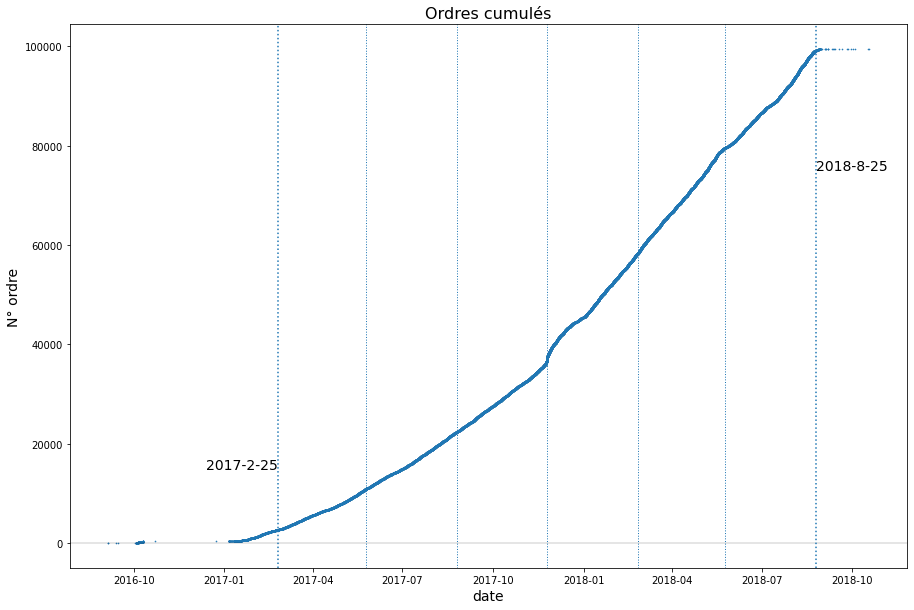

In [44]:
# Tracé cumulatif des ordres 
ser = df_orders['order_purchase_timestamp'].sort_values()
ser.reset_index(drop=True, inplace=True)
plt.figure(figsize=(15,10))
plt.scatter(ser, ser.index, s=0.4)
plt.xlabel('date', size=14)
plt.ylabel('N° ordre', size=14)
plt.title('Ordres cumulés', size=16)
plt.axhline(0, color='k', linewidth=0.2)
# plt.axhline(100000, color='k', linewidth=0.2)

# Tracé des lignes verticales
plt.axvline(DEBUT_TRIMESTRE_1, linestyle=':')
plt.axvline(FIN_TRIMESTRE_6, linestyle=':')
for i in range(1, 6):
    nom_var = 'récence_' + "fin_trimestre_" + str(i)
    fin_trimestre_i = globals()["FIN_TRIMESTRE_" + str(i)]
    plt.axvline(fin_trimestre_i, linestyle=':', linewidth=1 )
plt.annotate("2017-2-25", (DEBUT_TRIMESTRE_1, 15000), horizontalalignment='right', size=14)
plt.annotate("2018-8-25", (FIN_TRIMESTRE_6, 75000), horizontalalignment='left', size=14);

### Nombre d'ordres par trimestre

In [57]:
dates = [DEBUT_TRIMESTRE_1, FIN_TRIMESTRE_1, FIN_TRIMESTRE_2, FIN_TRIMESTRE_3, FIN_TRIMESTRE_4, FIN_TRIMESTRE_5, FIN_TRIMESTRE_6]
df_orders['trimestre'] = pd.cut(df_orders.order_purchase_timestamp, bins=dates)
df_orders.groupby('trimestre').count().order_id

trimestre
(2017-02-25, 2017-05-25]     8210
(2017-05-25, 2017-08-25]    11408
(2017-08-25, 2017-11-25]    15154
(2017-11-25, 2018-02-25]    20786
(2018-02-25, 2018-05-25]    21302
(2018-05-25, 2018-08-25]    19567
Name: order_id, dtype: int64

In [58]:
print("Nombre d'ordres :")
ser = (df_orders['order_purchase_timestamp'] < FIN_TRIMESTRE_1)  &  (df_orders['order_purchase_timestamp'] > DEBUT_TRIMESTRE_1)
print("- trimestre 1 :", ser.sum())
for i in range (2, 7):
    fin_trimestre_i = globals()["FIN_TRIMESTRE_" + str(i)]
    fin_trimestre_j = globals()["FIN_TRIMESTRE_" + str(i-1)]
    ser = (df_orders['order_purchase_timestamp'] > fin_trimestre_j)  &  (df_orders['order_purchase_timestamp'] < fin_trimestre_i)
    print(f"- trimestre {i} :", ser.sum())

Nombre d'ordres :
- trimestre 1 : 8210
- trimestre 2 : 11408
- trimestre 3 : 15154
- trimestre 4 : 20786
- trimestre 5 : 21302
- trimestre 6 : 19567


## df_translation

In [59]:
df_translation = pd.read_csv('product_category_name_translation.csv',
                           sep=',',
                           low_memory=False)

In [60]:
df_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [61]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_translation, title='df_translation Pandas Profiling Report', minimal=True)
report

False

## df_products

In [62]:
df_products = pd.read_csv('olist_products_dataset.csv',
                           sep=',',
                           low_memory=False)

In [63]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### Traduction des product_category_name en anglais

In [64]:
df_products = pd.merge(df_products, df_translation, how='outer')    # outer conserve les produits avec un nom NaN   # copy=True par défaut
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [65]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_products, title='df_products Pandas Profiling Report', minimal=True)
report

False

In [66]:
report = BOOL_EDA
if report:
    report = create_report(df_products)
report

False

## df_sellers

In [67]:
df_sellers = pd.read_csv('olist_sellers_dataset.csv',
                           sep=',',
                           low_memory=False)

In [68]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [69]:
report = BOOL_EDA
if report:
    report = ProfileReport(df_sellers, title='df_sellers Pandas Profiling Report', minimal=True)
report

False

## Nombre de lignes des dataframes

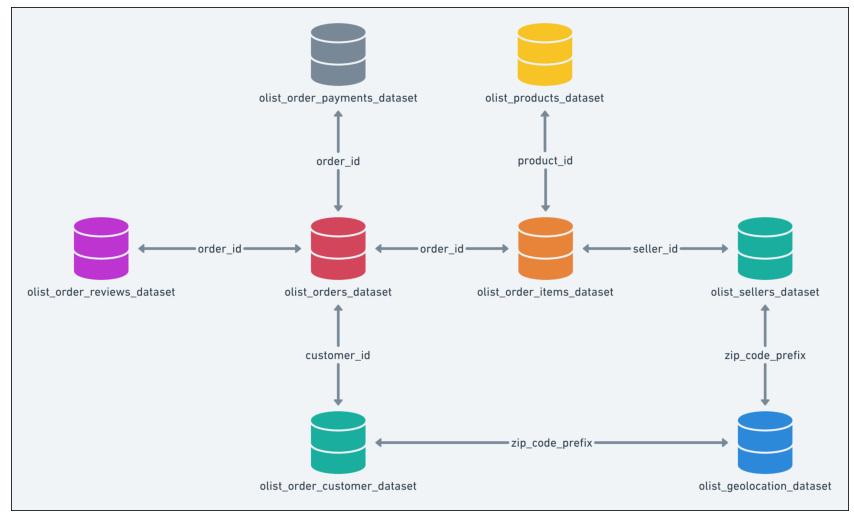

Nb de lignes :
df_customers : 99441
df_geolocation : 19015
df_items : 112650
df_payments : 99440
df_reviews : 99441
df_orders : 99441
df_products : 32951
df_sellers : 3095
Nombre de clients uniques : 96096


In [70]:
plt.figure(figsize=(15,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image_data_schema)
plt.show()

print("Nb de lignes :")
print("df_customers :", len(df_customers))
print("df_geolocation :", len(df_geolocation))
print("df_items :", len(df_items))
print("df_payments :", len(df_payments))
print("df_reviews :", len(df_reviews))
print("df_orders :", len(df_orders))
print("df_products :", len(df_products))
print("df_sellers :", len(df_sellers))
print("Nombre de clients uniques :", len(df_customers['customer_unique_id'].unique()))

## Union des dataframes (df_merge)

On merge en partant du dataframe df_customers, car les clients sont le sujet central de la segmentation.

In [71]:
# df_customers ET df_geolocation
df_merged = pd.merge(
    df_customers,
    df_geolocation,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix', how='left')  # copy=True par défaut

df_merged.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], inplace=True)

df_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614


In [72]:
# ... ET df_orders
df_merged = pd.merge(
    df_merged,
    df_orders,
    on='customer_id', how='inner')  # copy=True par défaut

df_merged.drop(columns=['customer_id'], inplace=True)

df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]"
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]"
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]"
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]"
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]"
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]"
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]"
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]"


In [73]:
# ... ET df_items
df_merged = pd.merge(
    df_merged,
    df_items,
    on='order_id', how='left')  # copy=True par défaut

df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]",1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]",1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]",1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]",1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]",1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]",1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]",1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]",1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]",1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


Pas de fusion avec df_payments pour le moment. Il faudrait retravailler df_payments d'abord.

In [74]:
# # ... ET df_payments
# df_merged = pd.merge(
#     df_merged,
#     df_payments,
#     on='order_id', how='inner')  # copy=True par défaut

# df_merged

In [75]:
# ... ET df_reviews
df_merged = pd.merge(
    df_merged,
    df_reviews,
    on='order_id', how='left')  # copy=True par défaut

df_merged.drop(columns=['review_id', 'review_comment_title', 'review_comment_message',
                        'review_creation_date', 'review_answer_timestamp'], inplace=True)

df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]",1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,4
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]",1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,5
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]",1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]",1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,5
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]",1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]",1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,4
113421,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]",1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,5
113422,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]",1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,1
113423,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]",1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,5


In [76]:
# ... ET df_products
df_merged = pd.merge(
    df_merged,
    df_products,
    on='product_id', how='left')  # copy=True par défaut

df_merged.drop(columns=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]",1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,4,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]",1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,5,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]",1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]",1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,5,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]",1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,5,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]",1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,4,books_general_interest
113421,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]",1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,5,sports_leisure
113422,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]",1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,1,health_beauty
113423,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]",1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,5,watches_gifts


In [77]:
# ... ET df_sellers
df_merged = pd.merge(
    df_merged,
    df_sellers,
    on='seller_id', how='left')  # copy=True par défaut

df_merged.drop(columns=['seller_city', 'seller_state'], inplace=True)

df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score,product_category_name_english,seller_zip_code_prefix
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]",1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,4,office_furniture,8577.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]",1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,5,housewares,88303.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]",1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5,office_furniture,8577.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]",1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,5,office_furniture,8577.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]",1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,5,home_confort,14940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]",1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,4,books_general_interest,17400.0
113421,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]",1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,5,sports_leisure,14802.0
113422,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]",1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,1,health_beauty,3304.0
113423,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]",1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,5,watches_gifts,14840.0


In [78]:
report = BOOL_EDA
report = False
if report:
    report = create_report(df_merged)
    report.show_browser()

In [79]:
df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score,product_category_name_english,seller_zip_code_prefix
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]",1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,4,office_furniture,8577.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]",1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,5,housewares,88303.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]",1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5,office_furniture,8577.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]",1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,5,office_furniture,8577.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]",1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,5,home_confort,14940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]",1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,4,books_general_interest,17400.0
113421,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]",1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,5,sports_leisure,14802.0
113422,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]",1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,1,health_beauty,3304.0
113423,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]",1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,5,watches_gifts,14840.0


# Feature engineering

Il faut faire attention à df_items. Ajout df_items va fausser le nb de orders.  
Il faudra traiter le cas du nb d'items par achat séparément.  

In [80]:
# df_customers ET df_orders
df_customers_orders = pd.merge(
    df_customers,
    df_orders,
    on='customer_id', how='inner')  # copy=True par défaut

df_customers_orders.drop(columns=['customer_id'], inplace=True)

df_customers_orders

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"(2017-02-25, 2017-05-25]"
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"(2017-11-25, 2018-02-25]"
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"(2018-02-25, 2018-05-25]"
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"(2018-02-25, 2018-05-25]"
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"(2018-05-25, 2018-08-25]"
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,"(2018-02-25, 2018-05-25]"
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,"(2018-02-25, 2018-05-25]"
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,"(2018-02-25, 2018-05-25]"
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,"(2017-08-25, 2017-11-25]"


## Récences (par trimestre, pour chaque client)

On commence par ajouter une colonne qui donne le trimestre correspondant à chaque ligne : 

In [94]:
dates = [DEBUT_TRIMESTRE_1, FIN_TRIMESTRE_1, FIN_TRIMESTRE_2, FIN_TRIMESTRE_3, FIN_TRIMESTRE_4, FIN_TRIMESTRE_5, FIN_TRIMESTRE_6]
df_customers_orders['trimestre'] = pd.cut(df_customers_orders.order_purchase_timestamp, bins=dates, labels=[f'Trimestre {i+1}' for i in range(6)])
df_customers_orders.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,trimestre
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,Trimestre 1
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,Trimestre 4
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Trimestre 5
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,Trimestre 5
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,Trimestre 6


On ne garde, pour chaque client et chaque trimestre, que la date d'ordre la plus récente, et on utilise la méthode `unstack()` pour créer une colonne de récence pour chaque trimestre: 

In [95]:
df_customers_orders_recent = df_customers_orders.groupby(['customer_unique_id', 'trimestre']).max().order_purchase_timestamp.dropna()
df_customers_orders_recent = df_customers_orders_recent.unstack('trimestre')
df_customers_orders_recent.head()

trimestre,Trimestre 1,Trimestre 2,Trimestre 3,Trimestre 4,Trimestre 5,Trimestre 6
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaT,NaT,NaT,NaT,2018-05-10 10:56:27,NaT
0000b849f77a49e4a4ce2b2a4ca5be3f,NaT,NaT,NaT,NaT,2018-05-07 11:11:27,NaT
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,NaT,NaT,NaT,NaT,NaT
0000f6ccb0745a6a4b88665a16c9f078,NaT,NaT,2017-10-12 20:29:41,NaT,NaT,NaT
0004aac84e0df4da2b147fca70cf8255,NaT,NaT,2017-11-14 19:45:42,NaT,NaT,NaT


### Trimestre 1

Mode opératoire :  
1) filtrer par date (ne garder qu'un trimestre).  
2) pour chaque customer :  
\- trouver le dernier achat.  
\- calculer la récence.  

In [ ]:
df_customers_orders_recent = df_customers_orders.groupby(['customer_unique_id', 'trimestre']).max().order_purchase_timestamp
df_customers_orders_recent.head()

In [85]:
df_customers_orders_recent = df_customers_orders_recent.unstack('trimestre')
df_customers


trimestre,"(2017-02-25, 2017-05-25]","(2017-05-25, 2017-08-25]","(2017-08-25, 2017-11-25]","(2017-11-25, 2018-02-25]","(2018-02-25, 2018-05-25]","(2018-05-25, 2018-08-25]"
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaT,NaT,NaT,NaT,2018-05-10 10:56:27,NaT
0000b849f77a49e4a4ce2b2a4ca5be3f,NaT,NaT,NaT,NaT,2018-05-07 11:11:27,NaT
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,NaT,NaT,NaT,NaT,NaT
0000f6ccb0745a6a4b88665a16c9f078,NaT,NaT,2017-10-12 20:29:41,NaT,NaT,NaT
0004aac84e0df4da2b147fca70cf8255,NaT,NaT,2017-11-14 19:45:42,NaT,NaT,NaT


In [672]:
# filtration par trimestre
ser_bool = (df_customers_orders['order_purchase_timestamp'] > DEBUT_TRIMESTRE_1) & (df_customers_orders['order_purchase_timestamp'] < FIN_TRIMESTRE_1)
df_trim1 = df_customers_orders[['customer_unique_id', 'order_purchase_timestamp']][ser_bool]
df_trim1

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
18,7f3a72e8f988c6e735ba118d54f47458,2017-05-11 13:48:47
23,4390ddbb6276a66ff1736a6710205dca,2017-04-14 11:24:56
27,2e6a42a9b5cbb0da62988694f18ee295,2017-05-15 17:58:25
63,332cf4e83e16004ba7dca932ce82475b,2017-04-02 22:15:27
...,...,...
99419,c811311629fd3d76f5ca5eeb2abfa7e8,2017-04-10 00:08:56
99424,206e64e8af2633a2ebe158a7fcb860db,2017-05-15 17:42:38
99428,874c93d867b18eb09a5e2f071ee89458,2017-03-27 16:26:18
99430,277490f0d435b602fe4475d4b89e9181,2017-05-24 11:54:31


In [673]:
# groupby sur customer_unique_id, puis calcul du max pour chaque groupe (le max étant la date la plus récente)
df_trim1_recent = df_trim1.groupby('customer_unique_id', sort=False).max()
df_trim1_recent

,order_purchase_timestamp
customer_unique_id,
861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
7f3a72e8f988c6e735ba118d54f47458,2017-05-11 13:48:47
4390ddbb6276a66ff1736a6710205dca,2017-04-14 11:24:56
2e6a42a9b5cbb0da62988694f18ee295,2017-05-15 17:58:25
332cf4e83e16004ba7dca932ce82475b,2017-04-02 22:15:27
...,...
c811311629fd3d76f5ca5eeb2abfa7e8,2017-04-10 00:08:56
206e64e8af2633a2ebe158a7fcb860db,2017-05-15 17:42:38
874c93d867b18eb09a5e2f071ee89458,2017-03-27 16:26:18


In [674]:
# calcul de la récence
df_trim1_recent['récence_fin_trimestre_1'] = FIN_TRIMESTRE_1 - df_trim1_recent['order_purchase_timestamp'].copy()
df_trim1_recent

,order_purchase_timestamp,récence_fin_trimestre_1
customer_unique_id,,
861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,8 days 08:54:25
7f3a72e8f988c6e735ba118d54f47458,2017-05-11 13:48:47,13 days 10:11:13
4390ddbb6276a66ff1736a6710205dca,2017-04-14 11:24:56,40 days 12:35:04
2e6a42a9b5cbb0da62988694f18ee295,2017-05-15 17:58:25,9 days 06:01:35
332cf4e83e16004ba7dca932ce82475b,2017-04-02 22:15:27,52 days 01:44:33
...,...,...
c811311629fd3d76f5ca5eeb2abfa7e8,2017-04-10 00:08:56,44 days 23:51:04
206e64e8af2633a2ebe158a7fcb860db,2017-05-15 17:42:38,9 days 06:17:22
874c93d867b18eb09a5e2f071ee89458,2017-03-27 16:26:18,58 days 07:33:42


In [675]:
# Union df_merged ET df_trim1_recent
df_trim1_recent.drop(columns=['order_purchase_timestamp'], inplace=True)

df_merged = pd.merge(
    df_merged,
    df_trim1_recent,
    on='customer_unique_id', how='left')  # copy=True par défaut

df_merged

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score,product_category_name_english,seller_zip_code_prefix,récence_fin_trimestre_1
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,4,office_furniture,8577.0,8 days 08:54:25
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,5,housewares,88303.0,NaT
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5,office_furniture,8577.0,NaT
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,5,office_furniture,8577.0,NaT
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,5,home_confort,14940.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,4,books_general_interest,17400.0,NaT
113421,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,5,sports_leisure,14802.0,NaT
113422,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,1,health_beauty,3304.0,NaT
113423,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,5,watches_gifts,14840.0,NaT


La plupart des clients font un achat unique. La récence est surtout liée à la date choisie pour la fin d'un trimestre.  
J'arrête de travailler sur la récence à ce stade, car je n'en vois pas la pertinence pour du clustering sur les données Olist.  

## Fréquences (nb d'ordres par trimestres)

Mode opératoire :  
1) filtrer par date (ne garder qu'un trimestre).  
2) pour chaque customer :  
\- trouver les ordres.  
\- sommer le nb d'ordres.  

### Trimestre 1

In [65]:
# filtration par trimestre
ser_bool = (df_customers_orders['order_purchase_timestamp'] > DEBUT_TRIMESTRE_1) & (df_customers_orders['order_purchase_timestamp'] < FIN_TRIMESTRE_1)
df_trim1 = df_customers_orders[['customer_unique_id', 'order_purchase_timestamp']][ser_bool]
df_trim1

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
18,7f3a72e8f988c6e735ba118d54f47458,2017-05-11 13:48:47
23,4390ddbb6276a66ff1736a6710205dca,2017-04-14 11:24:56
27,2e6a42a9b5cbb0da62988694f18ee295,2017-05-15 17:58:25
63,332cf4e83e16004ba7dca932ce82475b,2017-04-02 22:15:27
...,...,...
99419,c811311629fd3d76f5ca5eeb2abfa7e8,2017-04-10 00:08:56
99424,206e64e8af2633a2ebe158a7fcb860db,2017-05-15 17:42:38
99428,874c93d867b18eb09a5e2f071ee89458,2017-03-27 16:26:18
99430,277490f0d435b602fe4475d4b89e9181,2017-05-24 11:54:31


In [66]:
# groupby sur customer_unique_id, puis calcul du count() pour chaque groupe
df_trim1_count = df_trim1.groupby('customer_unique_id', sort=False).count()
df_trim1_count.sort_values(by='order_purchase_timestamp')

,order_purchase_timestamp
customer_unique_id,
861eff4711a542e4b93843c6dd7febb0,1
72ce629a45d8ae96d22c2946aaf876f2,1
088bf76cf4381f8f43e7be30e6635cb0,1
06b609212808563b18a3f818b86dd01d,1
d43e65a5517eba2373cb75a76b151796,1
...,...
565448508b44312e8489ca1bc1f5d09e,3
c6df3869c263531ebd51f0454a353605,3
cc14ea7099959d91a17c9d7c3a46721d,3


In [67]:
# renommage de la colonne
df_trim1_count.columns = ['nb_ordres_trimestre_1']
df_trim1_count

,nb_ordres_trimestre_1
customer_unique_id,
861eff4711a542e4b93843c6dd7febb0,1
7f3a72e8f988c6e735ba118d54f47458,1
4390ddbb6276a66ff1736a6710205dca,1
2e6a42a9b5cbb0da62988694f18ee295,1
332cf4e83e16004ba7dca932ce82475b,1
...,...
c811311629fd3d76f5ca5eeb2abfa7e8,1
206e64e8af2633a2ebe158a7fcb860db,1
874c93d867b18eb09a5e2f071ee89458,1


In [68]:
# Union df_customers_orders ET df_trim1_count
df_customers_orders = pd.merge(
    df_customers_orders,
    df_trim1_count,
    on='customer_unique_id', how='left')  # copy=True par défaut

df_customers_orders

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_ordres_trimestre_1
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,NaN
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,NaN
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,NaN
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,NaN
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,NaN
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,NaN
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,NaN


### Trimestres 2 à 6

In [69]:
for i in range(2, 7):
    # filtration par trimestre
    ser_bool = (df_customers_orders['order_purchase_timestamp'] > FIN_TRIMESTRE[i-1]) & (df_customers_orders['order_purchase_timestamp'] < FIN_TRIMESTRE[i])
    df_trim = df_customers_orders[['customer_unique_id', 'order_purchase_timestamp']][ser_bool]
    # groupby sur customer_unique_id, puis calcul du count() pour chaque groupe
    df_trim_count = df_trim.groupby('customer_unique_id', sort=False).count()
    # renommage de la colonne
    df_trim_count.columns = ['nb_ordres_trimestre_' + str(i)]
    # Union df_customers_orders ET df_trim1_count
    df_customers_orders = pd.merge(
        df_customers_orders,
        df_trim_count,
        on='customer_unique_id', how='left')  # copy=True par défaut

df_customers_orders

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_ordres_trimestre_1,nb_ordres_trimestre_2,nb_ordres_trimestre_3,nb_ordres_trimestre_4,nb_ordres_trimestre_5,nb_ordres_trimestre_6
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,NaN,NaN,NaN,NaN,NaN
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,NaN,NaN,NaN,1.0,NaN,NaN
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,NaN,NaN,NaN,NaN,1.0,NaN
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,NaN,NaN,NaN,NaN,1.0,NaN
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,NaN,NaN,NaN,NaN,1.0,NaN
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,NaN,NaN,NaN,NaN,1.0,NaN
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,NaN,NaN,NaN,NaN,1.0,NaN
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,NaN,NaN,1.0,NaN,NaN,NaN


## Montants (total, par trimestre)

In [70]:
# df_customers ET df_orders ET df_payments
df_customers_orders_payments = pd.merge(
    df_customers_orders,
    df_payments,
    on='order_id', how='inner')  # copy=True par défaut

df_customers_orders_payments

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_ordres_trimestre_1,nb_ordres_trimestre_2,nb_ordres_trimestre_3,nb_ordres_trimestre_4,nb_ordres_trimestre_5,nb_ordres_trimestre_6,payment_value_order
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,NaN,NaN,NaN,NaN,NaN,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,NaN,NaN,NaN,1.0,NaN,NaN,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,NaN,NaN,NaN,NaN,1.0,NaN,157.73
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,NaN,NaN,NaN,NaN,1.0,NaN,173.30
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,NaN,NaN,NaN,NaN,NaN,1.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,NaN,NaN,NaN,NaN,1.0,NaN,88.78
99436,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,NaN,NaN,NaN,NaN,1.0,NaN,129.06
99437,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,NaN,NaN,NaN,NaN,1.0,NaN,56.04
99438,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,NaN,NaN,1.0,NaN,NaN,NaN,711.07


### Trimestre 1

In [71]:
# filtration par trimestre
ser_bool = (df_customers_orders_payments['order_purchase_timestamp'] > DEBUT_TRIMESTRE_1) & (df_customers_orders_payments['order_purchase_timestamp'] < FIN_TRIMESTRE_1)
df_trim1 = df_customers_orders_payments[['customer_unique_id', 'payment_value_order']][ser_bool]
df_trim1

,customer_unique_id,payment_value_order
0,861eff4711a542e4b93843c6dd7febb0,146.87
18,7f3a72e8f988c6e735ba118d54f47458,102.03
23,4390ddbb6276a66ff1736a6710205dca,94.63
27,2e6a42a9b5cbb0da62988694f18ee295,47.59
63,332cf4e83e16004ba7dca932ce82475b,146.21
...,...,...
99418,c811311629fd3d76f5ca5eeb2abfa7e8,58.95
99423,206e64e8af2633a2ebe158a7fcb860db,102.03
99427,874c93d867b18eb09a5e2f071ee89458,130.85
99429,277490f0d435b602fe4475d4b89e9181,102.03


In [72]:
# affichage des clients qui font plusieurs achats
ser_bool = df_trim1['customer_unique_id'].duplicated(keep=False)
df_trim1[ser_bool].sort_values(by='customer_unique_id')

,customer_unique_id,payment_value_order
8960,00cc12a6d8b578b8ebd21ea4e2ae8b27,44.42
672,00cc12a6d8b578b8ebd21ea4e2ae8b27,81.78
19704,015557c9912277312b9073947804a7ba,242.22
86612,015557c9912277312b9073947804a7ba,72.90
6804,0396c443fdda5498c7e9ed5b34871c5a,67.42
...,...,...
13004,fafbc4ecb15933633821dfd530c9263b,137.99
15488,ff44401d0d8f5b9c54a47374eb48c1b8,29.00
88271,ff44401d0d8f5b9c54a47374eb48c1b8,39.00
12133,ffe254cc039740e17dd15a5305035928,28.42


In [73]:
# groupby sur customer_unique_id, puis calcul de sum() pour chaque groupe
df_trim1_sum = df_trim1.groupby('customer_unique_id', sort=False).sum()
df_trim1_sum

,payment_value_order
customer_unique_id,
861eff4711a542e4b93843c6dd7febb0,146.87
7f3a72e8f988c6e735ba118d54f47458,102.03
4390ddbb6276a66ff1736a6710205dca,94.63
2e6a42a9b5cbb0da62988694f18ee295,47.59
332cf4e83e16004ba7dca932ce82475b,146.21
...,...
c811311629fd3d76f5ca5eeb2abfa7e8,58.95
206e64e8af2633a2ebe158a7fcb860db,102.03
874c93d867b18eb09a5e2f071ee89458,130.85


In [74]:
# renommage de la colonne
df_trim1_sum.columns = ['somme_paiements_trimestre_1']
df_trim1_sum.sort_values(by='somme_paiements_trimestre_1')

,somme_paiements_trimestre_1
customer_unique_id,
c5f7c49309422ad1ab3af1c3519f92f5,13.68
8033b326df991ace634ac72bd3a02fb5,14.62
bf004b2b614c68e6d2401afc33741b33,14.72
0651cfbea51afc6cfa5ec45bca3ee692,14.78
a739e18da2ae060751cb8cff6313d729,15.22
...,...
011875f0176909c5cf0b14a9138bb691,4016.91
edf81e1f3070b9dac83ec83dacdbb9bc,4194.76
eebb5dda148d3893cdaf5b5ca3040ccb,4764.34


In [75]:
df_trim1_sum

,somme_paiements_trimestre_1
customer_unique_id,
861eff4711a542e4b93843c6dd7febb0,146.87
7f3a72e8f988c6e735ba118d54f47458,102.03
4390ddbb6276a66ff1736a6710205dca,94.63
2e6a42a9b5cbb0da62988694f18ee295,47.59
332cf4e83e16004ba7dca932ce82475b,146.21
...,...
c811311629fd3d76f5ca5eeb2abfa7e8,58.95
206e64e8af2633a2ebe158a7fcb860db,102.03
874c93d867b18eb09a5e2f071ee89458,130.85


In [76]:
# Union df_customers_orders_payments ET df_trim1_count
df_customers_orders_payments = pd.merge(
    df_customers_orders_payments,
    df_trim1_sum,
    on='customer_unique_id', how='left')  # copy=True par défaut

df_customers_orders_payments

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_ordres_trimestre_1,nb_ordres_trimestre_2,nb_ordres_trimestre_3,nb_ordres_trimestre_4,nb_ordres_trimestre_5,nb_ordres_trimestre_6,payment_value_order,somme_paiements_trimestre_1
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,NaN,NaN,NaN,NaN,NaN,146.87,146.87
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,NaN,NaN,NaN,1.0,NaN,NaN,335.48,NaN
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,NaN,NaN,NaN,NaN,1.0,NaN,157.73,NaN
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,NaN,NaN,NaN,NaN,1.0,NaN,173.30,NaN
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,NaN,NaN,NaN,NaN,NaN,1.0,252.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,NaN,NaN,NaN,NaN,1.0,NaN,88.78,NaN
99436,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,NaN,NaN,NaN,NaN,1.0,NaN,129.06,NaN
99437,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,NaN,NaN,NaN,NaN,1.0,NaN,56.04,NaN
99438,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,NaN,NaN,1.0,NaN,NaN,NaN,711.07,NaN


In [77]:
# on teste qu'on a bien fait la somme des différents ordres des clients à ordres multiples pour le trimestre 1
ser_bool_duplicated = df_customers_orders_payments['customer_unique_id'].duplicated(keep=False)
df_customers_orders_payments[ser_bool_duplicated].sort_values(by='customer_unique_id')

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_ordres_trimestre_1,nb_ordres_trimestre_2,nb_ordres_trimestre_3,nb_ordres_trimestre_4,nb_ordres_trimestre_5,nb_ordres_trimestre_6,payment_value_order,somme_paiements_trimestre_1
35607,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,c306eca42d32507b970739b5b6a5a33a,canceled,2018-08-13 09:14:07,NaT,NaT,NaT,2018-09-05,NaN,NaN,NaN,NaN,NaN,2.0,122.07,NaN
19299,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA,bb874c45df1a3c97842d52f31efee99a,delivered,2018-07-28 00:23:49,2018-07-28 00:35:19,2018-07-31 15:57:00,2018-08-07 19:28:41,2018-08-22,NaN,NaN,NaN,NaN,NaN,2.0,122.07,NaN
20023,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ,a61d617fbe5bd006e40d3a0988fc844b,delivered,2017-07-27 14:13:03,2017-07-27 14:25:14,2017-07-28 17:45:36,2017-08-04 16:26:54,2017-08-18,NaN,1.0,NaN,1.0,NaN,NaN,251.09,NaN
22065,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ,08204559bebd39e09ee52dcb56d8faa2,delivered,2018-01-14 07:36:54,2018-01-14 07:49:28,2018-01-16 16:39:34,2018-01-19 22:14:14,2018-02-09,NaN,1.0,NaN,1.0,NaN,NaN,103.28,NaN
72450,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL,90ae229a4addcfead792e2564554f09c,shipped,2017-09-01 12:11:23,2017-09-05 04:30:20,2017-09-08 19:42:16,NaT,2017-10-06,NaN,NaN,1.0,NaN,NaN,1.0,97.87,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75056,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP,fd216c435fda2be27c92920a5e5dba82,delivered,2017-02-22 12:26:42,2017-02-22 13:05:25,2017-02-23 13:26:17,2017-03-08 02:02:59,2017-03-23,NaN,1.0,1.0,NaN,NaN,NaN,39.42,NaN
27991,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP,6be1646fccbb69d34b22da3b1807d51d,delivered,2017-09-14 14:24:04,2017-09-14 14:39:31,2017-09-14 20:43:36,2017-09-18 20:47:54,2017-10-02,NaN,1.0,1.0,NaN,NaN,NaN,42.58,NaN
79858,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP,5f79e2da24a52e76bc22897df03a7901,delivered,2017-08-23 13:15:29,2017-08-23 13:30:19,2017-09-22 13:45:55,2017-09-25 21:34:47,2017-09-21,NaN,1.0,1.0,NaN,NaN,NaN,57.60,NaN
64322,ffe254cc039740e17dd15a5305035928,37640,extrema,MG,39a0e2f723def2e12a51e963006c9242,delivered,2017-04-02 16:33:30,2017-04-02 16:42:23,2017-04-06 10:38:35,2017-04-19 16:13:08,2017-04-28,2.0,NaN,NaN,NaN,NaN,NaN,51.70,80.12


### Trimestres 2 à 6

In [78]:
for i in range(2, 7):
    # filtration par trimestre
    ser_bool = (df_customers_orders_payments['order_purchase_timestamp'] > FIN_TRIMESTRE[i-1]) & (df_customers_orders_payments['order_purchase_timestamp'] < FIN_TRIMESTRE[i])
    df_trim = df_customers_orders_payments[['customer_unique_id', 'payment_value_order']][ser_bool]
    # groupby sur customer_unique_id, puis calcul du sum() pour chaque groupe
    df_trim_sum = df_trim.groupby('customer_unique_id', sort=False).sum()
    # renommage de la colonne
    df_trim_sum.columns = ['somme_paiements_trimestre_' + str(i)]
    # Union df_customers_orders_payments ET df_trim_sum
    df_customers_orders_payments = pd.merge(
        df_customers_orders_payments,
        df_trim_sum,
        on='customer_unique_id', how='left')  # copy=True par défaut

df_customers_orders_payments

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_ordres_trimestre_1,nb_ordres_trimestre_2,nb_ordres_trimestre_3,nb_ordres_trimestre_4,nb_ordres_trimestre_5,nb_ordres_trimestre_6,payment_value_order,somme_paiements_trimestre_1,somme_paiements_trimestre_2,somme_paiements_trimestre_3,somme_paiements_trimestre_4,somme_paiements_trimestre_5,somme_paiements_trimestre_6
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,NaN,NaN,NaN,NaN,NaN,146.87,146.87,NaN,NaN,NaN,NaN,NaN
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,NaN,NaN,NaN,1.0,NaN,NaN,335.48,NaN,NaN,NaN,335.48,NaN,NaN
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,NaN,NaN,NaN,NaN,1.0,NaN,157.73,NaN,NaN,NaN,NaN,157.73,NaN
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,NaN,NaN,NaN,NaN,1.0,NaN,173.30,NaN,NaN,NaN,NaN,173.30,NaN
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,NaN,NaN,NaN,NaN,NaN,1.0,252.25,NaN,NaN,NaN,NaN,NaN,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,NaN,NaN,NaN,NaN,1.0,NaN,88.78,NaN,NaN,NaN,NaN,88.78,NaN
99436,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,NaN,NaN,NaN,NaN,1.0,NaN,129.06,NaN,NaN,NaN,NaN,129.06,NaN
99437,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,NaN,NaN,NaN,NaN,1.0,NaN,56.04,NaN,NaN,NaN,NaN,56.04,NaN
99438,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,NaN,NaN,1.0,NaN,NaN,NaN,711.07,NaN,NaN,711.07,NaN,NaN,NaN


## Montants (par ordre, par trimestre)

## Review score (moyenne, par trimestre)

## Payment installments (moyenne, par trimestre)